In [8]:
# Initial imports
%matplotlib inline

import pymc3 as pm
from scipy.stats import bernoulli
import numpy as np


In [42]:
#set constants
p_true = 0.05  # remember, this is unknown,
               # we generate the data with this value 
               # but in real life we are inferring it.
N = 1500 # Number of flips.

# sample N Bernoulli random variables from Ber(0.05).
# each random variable has a 0.05 chance of being a 1.
# This is the data-generation step, 
# here we should have the collected data
heads = bernoulli.rvs(p_true, size=N)

print(heads) 
print(np.sum(heads))

[0 0 0 ... 0 0 0]
73


In [43]:
import pymc3 as pm

# We create a parametric model with just one thing to infer:
# which is the p value of our bernoulli (p_true).
# parameters are the bounds of the Uniform.
with pm.Model() as model:
    p = pm.Uniform('p', lower=0, upper=1)

In [44]:
# We include the observations in the model, which are Bernoulli
with model:
    obs = pm.Bernoulli("obs", p, observed=occurrences)
    
    # THIS IS THE NEXT CLASS ABOUT!!!
    step = pm.Metropolis()
    trace = pm.sample(5000, step=step, tune=0) # Let's try the same with 1000 "tunning steps"
    burned_trace = trace[1000:]

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:07<00:00, 2533.73draws/s]
The number of effective samples is smaller than 10% for some parameters.


Lets trace the values that p gets each iteration

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


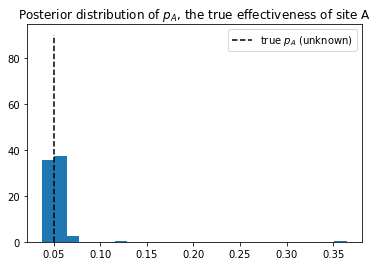

In [45]:
# The first one thousand iterations

import matplotlib.pyplot as plt

plt.title("Posterior distribution of $p_A$, the true effectiveness of site A")
plt.vlines(p_true, 0, 90, linestyle="--", label="true $p_A$ (unknown)")
plt.hist(trace["p"][0:1000], bins=25, histtype="stepfilled", normed=True)
plt.legend()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


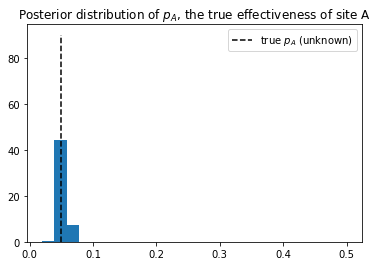

In [46]:
# The last one thousand

plt.title("Posterior distribution of $p_A$, the true effectiveness of site A")
plt.vlines(p_true, 0, 90, linestyle="--", label="true $p_A$ (unknown)")
plt.hist(trace["p"][4000:], bins=25, histtype="stepfilled", normed=True)
plt.legend()